In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [229]:
tvMarketing_Sales = pd.read_csv("tvmarketing.csv")
tvMarketing_Sales.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [230]:
tvMarketing_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


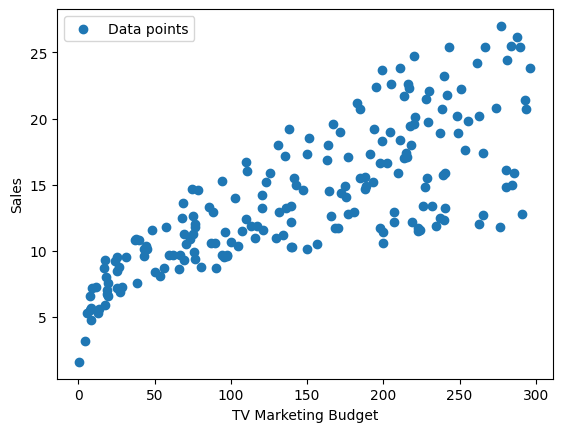

In [231]:

plt.scatter(tvMarketing_Sales.TV,tvMarketing_Sales.Sales,label = "Data points")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [ ]:
import numpy as np

def predict(x, m, b):
    return m * x + b

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)  

def compute_gradient(x, y_true, m, b):
    n = len(y_true)
    y_pred = predict(x, m, b)
    dm = (-2 / n) * np.sum((y_true - y_pred) * x)
    db = (-2 / n) * np.sum(y_true - y_pred)
    return dm, db

def gradient_descent(x, y, learning_rate, num_iterations):
    m = 0
    b = 0
    predictions = []  

    for i in range(num_iterations):
        dm, db = compute_gradient(x, y, m, b)
        m -= learning_rate * dm
        b -= learning_rate * db
        
        y_pred = predict(x, m, b)  
        predictions.append(y_pred)  


    final_mse = mean_squared_error(y, predict(x, m, b))
    return m, b, predictions, final_mse 


m_final, b_final, y_preds, final_mse = gradient_descent(tvMarketing_Sales.TV, tvMarketing_Sales.Sales, 0.00001, 1000)

print("Final m:", m_final)
print("Final b:", b_final)
print("Final MSE:", final_mse)




Final m: 0.08306733206652712
Final b: 0.03595509843345374
Final MSE: 22.91183269087695


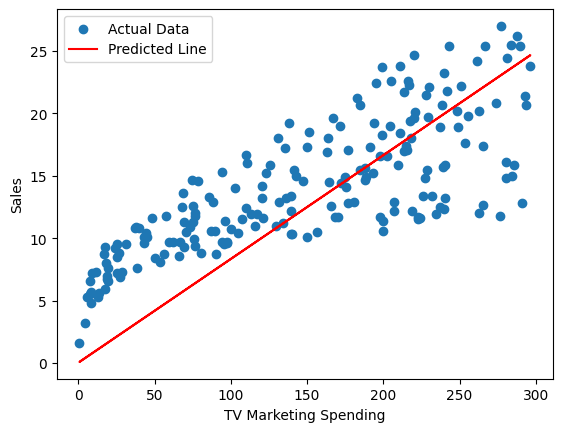

In [233]:
plt.scatter(tvMarketing_Sales.TV, tvMarketing_Sales.Sales, label="Actual Data")
plt.plot(tvMarketing_Sales.TV, predict(tvMarketing_Sales.TV, m_final, b_final), color="red", label="Predicted Line")
plt.xlabel("TV Marketing Spending")
plt.ylabel("Sales")
plt.legend()
plt.show()
